# Importação de bibliotecas


In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
from pandas import ExcelFile
import matplotlib.pyplot as plt
from scipy import stats

# Mapeamento da tradução dos microdados


In [2]:
micro_dados = ExcelFile("../datasets/Dicionario_Microdados_Enem_2023.xlsx").sheet_names[
    1:-1
]

pprint(micro_dados)

['TP_SIT_FUNC_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_FAIXA_ETARIA',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'Q001',
 'Q002',
 'Q003',
 'Q004',
 'Q005',
 'Q006',
 'Q007',
 'Q008',
 'Q009',
 'Q010',
 'Q011',
 'Q012',
 'Q013',
 'Q014',
 'Q015',
 'Q016',
 'Q017',
 'Q018',
 'Q019',
 'Q020',
 'Q021',
 'Q022',
 'Q023',
 'Q024',
 'Q025']


# Leitura traduções


In [3]:
df_micro_dados = {
    planilha: pd.read_excel(
        f"../datasets/Dicionario_Microdados_Enem_2023.xlsx",
        sheet_name=planilha,
        header=0,
    )
    for planilha in micro_dados
}

pprint(list(df_micro_dados.keys()))

['TP_SIT_FUNC_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_FAIXA_ETARIA',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'Q001',
 'Q002',
 'Q003',
 'Q004',
 'Q005',
 'Q006',
 'Q007',
 'Q008',
 'Q009',
 'Q010',
 'Q011',
 'Q012',
 'Q013',
 'Q014',
 'Q015',
 'Q016',
 'Q017',
 'Q018',
 'Q019',
 'Q020',
 'Q021',
 'Q022',
 'Q023',
 'Q024',
 'Q025']


# Leitura dos microdados


In [4]:
MAXIMO = 1_000_000

df = pd.read_csv(
    "../datasets/MICRODADOS_ENEM_2020.csv", sep=";", encoding="ISO-8859-1", nrows=MAXIMO
)

df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,...,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,...,A,A,A,B,A,B,B,A,A,B


## Drop de colunas desnecessárias


In [5]:
df.drop(
    columns=[
        # Dados da prova objetiva
        "CO_PROVA_CN",
        "CO_PROVA_CH",
        "CO_PROVA_LC",
        "CO_PROVA_MT",
        "TX_RESPOSTAS_CN",
        "TX_RESPOSTAS_CH",
        "TX_RESPOSTAS_LC",
        "TX_RESPOSTAS_MT",
        "TX_GABARITO_CN",
        "TX_GABARITO_CH",
        "TX_GABARITO_LC",
        "TX_GABARITO_MT",
        # Dados da redação
        "NU_NOTA_COMP1",
        "NU_NOTA_COMP2",
        "NU_NOTA_COMP3",
        "NU_NOTA_COMP4",
        "NU_NOTA_COMP5",
    ],
    inplace=True,
)

# Cruzamento das traduções com os microdados


In [6]:
for coluna in ["CO_MUNICIPIO_ESC", "CO_MUNICIPIO_PROVA", "CO_UF_ESC", "CO_UF_PROVA"]:
    df[coluna] = df[coluna].replace(np.nan, 0).astype(int)

for coluna in [
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_REDACAO",
]:
    df[coluna] = df[coluna].replace(np.nan, 0).astype(float)

# for tabela in df_micro_dados:
#     df = df.merge(df_micro_dados[tabela], on=tabela)

# df = df.drop(columns=df_micro_dados.keys())

df.shape

(1000000, 59)

In [7]:
df_saneamento = pd.read_csv("../datasets/br_mdr_snis_municipio_agua_esgoto.csv")

df_saneamento = df_saneamento[df_saneamento.ano == 2020].reset_index(drop=True)

df_saneamento.columns = df_saneamento.columns.str.upper()

df_saneamento.head()

,ANO,ID_MUNICIPIO,SIGLA_UF,POPULACAO_ATENDIDA_AGUA,POPULACAO_ATENTIDA_ESGOTO,POPULACAO_URBANA,POPULACAO_URBANA_RESIDENTE_AGUA,POPULACAO_URBANA_ATENDIDA_AGUA,POPULACAO_URBANA_ATENDIDA_AGUA_IBGE,POPULACAO_URBANA_RESIDENTE_ESGOTO,...,INVESTIMENTO_RECURSO_ONEROSO_MUNICIPIO,INVESTIMENTO_RECURSO_NAO_ONEROSO_MUNICIPIO,INVESTIMENTO_TOTAL_MUNICIPIO,INVESTIMENTO_AGUA_ESTADO,INVESTIMENTO_ESGOTO_ESTADO,INVESTIMENTO_OUTRO_ESTADO,INVESTIMENTO_RECURSO_PROPRIO_ESTADO,INVESTIMENTO_RECURSO_ONEROSO_ESTADO,INVESTIMENTO_RECURSO_NAO_ONEROSO_ESTADO,INVESTIMENTO_TOTAL_ESTADO
0,2020,2905107,BA,6942.0,547.0,3193.0,3193.0,3193.0,9058.0,3193.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,2909505,BA,3632.0,2763.0,3376.0,3376.0,3336.0,5351.0,3376.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,2910750,BA,16076.0,8000.0,6992.0,6992.0,6975.0,17845.0,6992.0,...,NaN,NaN,228725.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020,2915106,BA,9516.0,12242.0,9577.0,9577.0,9516.0,12242.0,9577.0,...,NaN,NaN,74000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,2917607,BA,41625.0,15885.0,41639.0,41639.0,41625.0,54673.0,41639.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Munícipios que tiveram prova do ENEM mas que não estão na pesquisa


In [8]:
df.CO_MUNICIPIO_ESC.nunique()

4772

In [9]:
df_saneamento.ID_MUNICIPIO.nunique()

5338

In [10]:
df.CO_MUNICIPIO_ESC.nunique() - df_saneamento.ID_MUNICIPIO.nunique()

-566

In [11]:
df[~df.CO_MUNICIPIO_ESC.isin(df_saneamento.ID_MUNICIPIO)]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,...,A,A,A,B,A,B,B,A,A,B
5,200003132410,2020,3,F,1,3,1,1,1,1,...,B,A,A,B,B,A,D,A,B,B
6,200001379770,2020,9,M,1,3,1,1,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,200002102494,2020,8,M,2,3,1,1,4,1,...,A,A,A,B,A,A,B,A,A,B
999995,200006515317,2020,11,M,2,3,1,1,12,1,...,B,A,A,B,A,A,C,A,B,A
999996,200003790136,2020,11,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A
999997,200005095024,2020,2,F,1,3,1,3,0,1,...,A,A,A,B,B,A,C,A,A,B


In [12]:
df[~df.CO_MUNICIPIO_ESC.isin(df_saneamento.ID_MUNICIPIO)].shape[0] / df.shape[0] * 100

78.521

# Q1. A cobertura de abastecimento de água (indice_atendimento_total_agua) explica diferenças na nota média de redação?


In [13]:
df_q1 = df.copy()
df_q1 = df_q1[df_q1.CO_MUNICIPIO_ESC != 0]
df_q1 = df_q1[df_q1.IN_TREINEIRO == 0]
df_q1 = df_q1[df_q1.TP_STATUS_REDACAO == 1]
df_q1 = df_q1[df_q1.TP_PRESENCA_CN == 1]
df_q1 = df_q1[df_q1.TP_PRESENCA_CH == 1]
df_q1 = df_q1[df_q1.TP_PRESENCA_LC == 1]
df_q1 = df_q1[df_q1.TP_PRESENCA_MT == 1]

df_q1_group = (
    df_q1.groupby(["CO_MUNICIPIO_ESC", "NO_MUNICIPIO_ESC"])
    .agg(
        NU_NOTA_CN_MEAN=("NU_NOTA_CN", "mean"),
        NU_NOTA_CH_MEAN=("NU_NOTA_CH", "mean"),
        NU_NOTA_LC_MEAN=("NU_NOTA_LC", "mean"),
        NU_NOTA_MT_MEAN=("NU_NOTA_MT", "mean"),
        NU_NOTA_REDACAO_MEAN=("NU_NOTA_REDACAO", "mean"),
    )
    .reset_index()
)

df_q1_group.head()

# NU_NOTA_CN -> Nota da prova de Ciências da Natureza
# NU_NOTA_CH -> Nota da prova de Ciências Humanas
# NU_NOTA_LC -> Nota da prova de Linguagens e Códigos
# NU_NOTA_MT -> Nota da prova de Matemática

df_q1_merged = df_q1_group.merge(
    df_saneamento, left_on="CO_MUNICIPIO_ESC", right_on="ID_MUNICIPIO"
).drop(columns=["ANO", "ID_MUNICIPIO"])

df_q1_merged.head()

,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,NU_NOTA_CN_MEAN,NU_NOTA_CH_MEAN,NU_NOTA_LC_MEAN,NU_NOTA_MT_MEAN,NU_NOTA_REDACAO_MEAN,SIGLA_UF,POPULACAO_ATENDIDA_AGUA,POPULACAO_ATENTIDA_ESGOTO,...,INVESTIMENTO_RECURSO_ONEROSO_MUNICIPIO,INVESTIMENTO_RECURSO_NAO_ONEROSO_MUNICIPIO,INVESTIMENTO_TOTAL_MUNICIPIO,INVESTIMENTO_AGUA_ESTADO,INVESTIMENTO_ESGOTO_ESTADO,INVESTIMENTO_OUTRO_ESTADO,INVESTIMENTO_RECURSO_PROPRIO_ESTADO,INVESTIMENTO_RECURSO_ONEROSO_ESTADO,INVESTIMENTO_RECURSO_NAO_ONEROSO_ESTADO,INVESTIMENTO_TOTAL_ESTADO
0,1100015,Alta Floresta D'Oeste,515.045455,549.354545,546.322727,539.663636,704.545455,RO,10716.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1100023,Ariquemes,488.038000,510.432000,524.336000,514.474000,600.800000,RO,92761.0,2280.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1100031,Cabixi,493.366667,487.233333,537.366667,469.800000,473.333333,RO,2332.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1100049,Cacoal,511.993506,548.225974,543.687013,559.361039,681.298701,RO,67689.0,46252.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1100056,Cerejeiras,440.455556,484.733333,497.688889,508.944444,575.555556,RO,10284.0,13821.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_q1_merged.shape

(4237, 138)

In [15]:
def plot_scatter(df: pd.DataFrame, x: str, y: str, ylabel: str) -> None:
    cols = [x, y]
    df_plot = df[cols].apply(pd.to_numeric, errors="coerce").dropna()

    X = df_plot[x]
    Y = df_plot[y]

    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    line_x = np.linspace(X.min(), X.max(), 200)
    line_y = intercept + slope * line_x

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.scatter(X, Y, alpha=0.6, edgecolor="k", label="Municípios")
    ax.plot(
        line_x,
        line_y,
        color="red",
        linewidth=2,
        label=f"y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_value**2:.3f}",
    )

    ax.set_xlabel("Índice de atendimento total de água (%)", fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(f"Cobertura de água vs. {ylabel}", fontsize=14, pad=12)
    ax.legend(frameon=False)
    ax.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

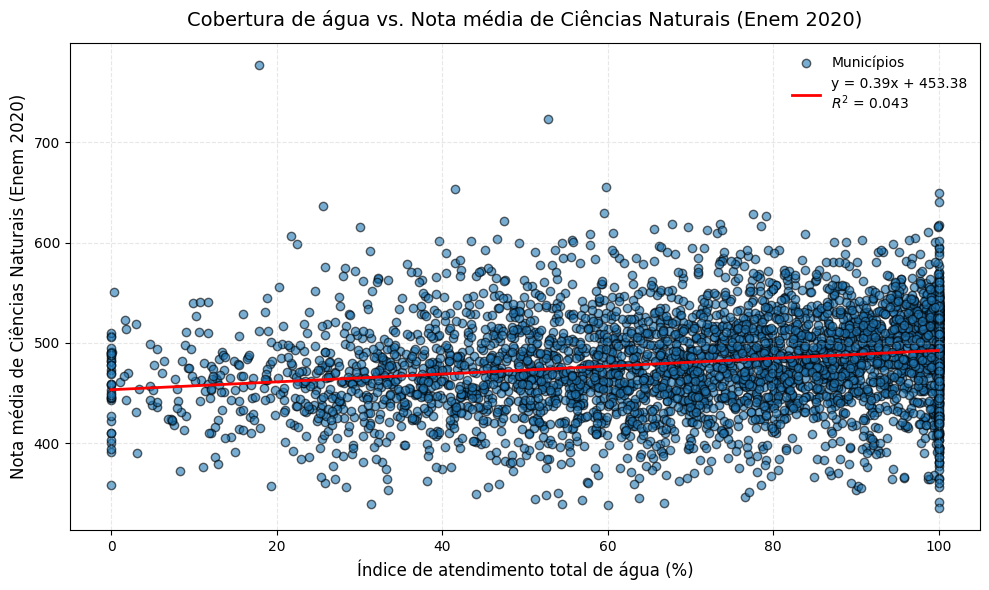

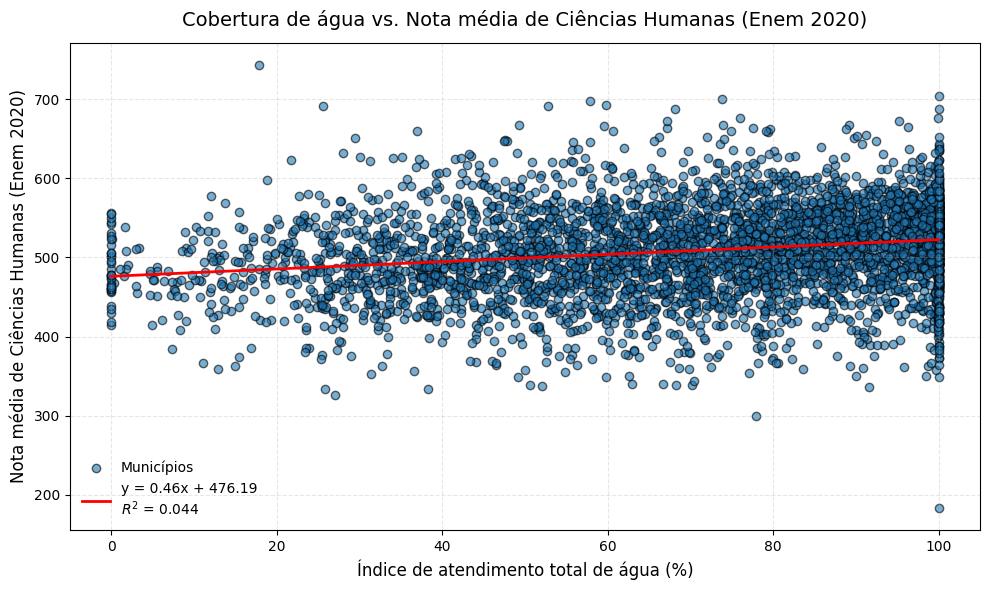

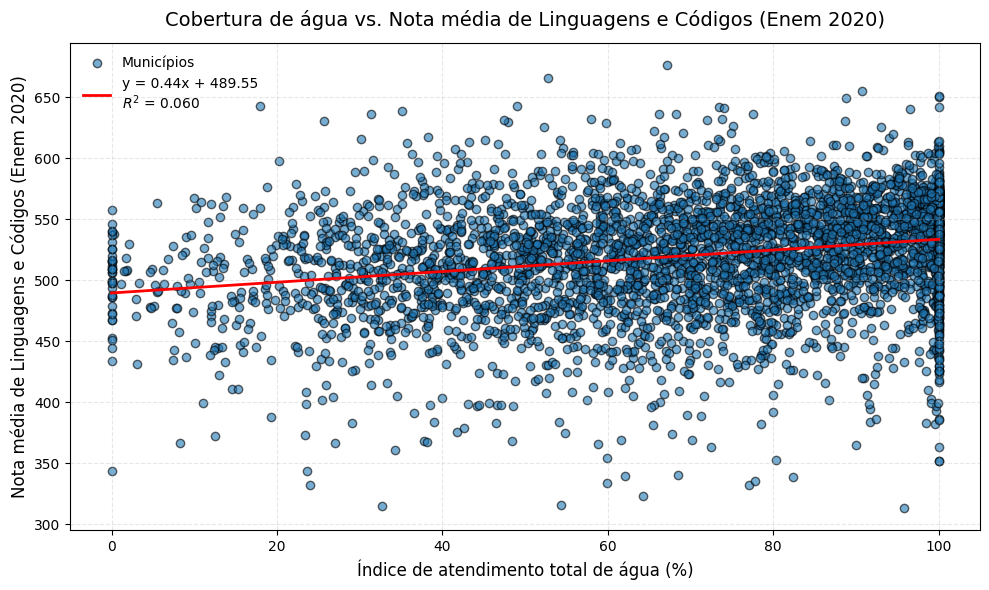

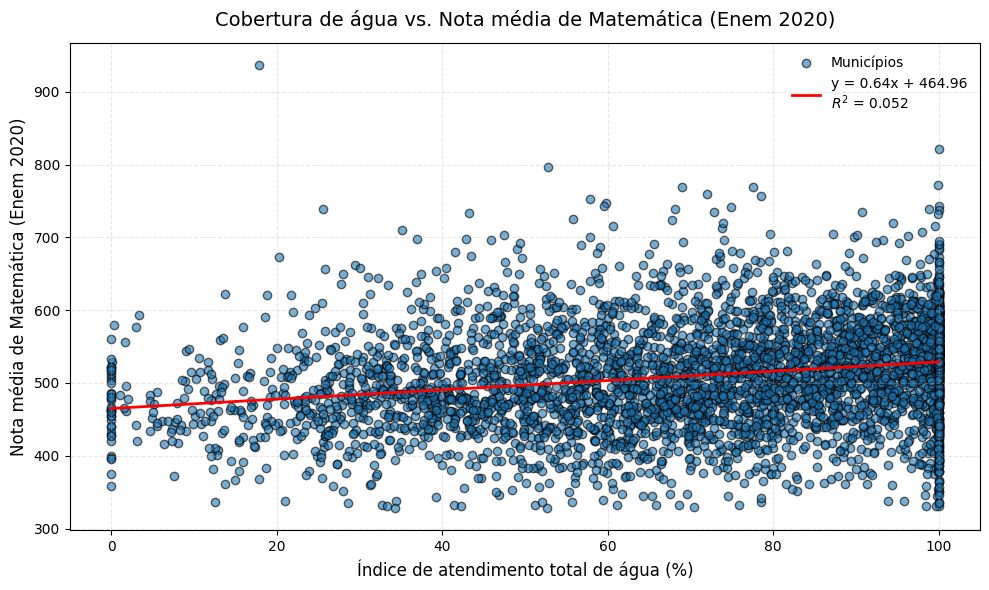

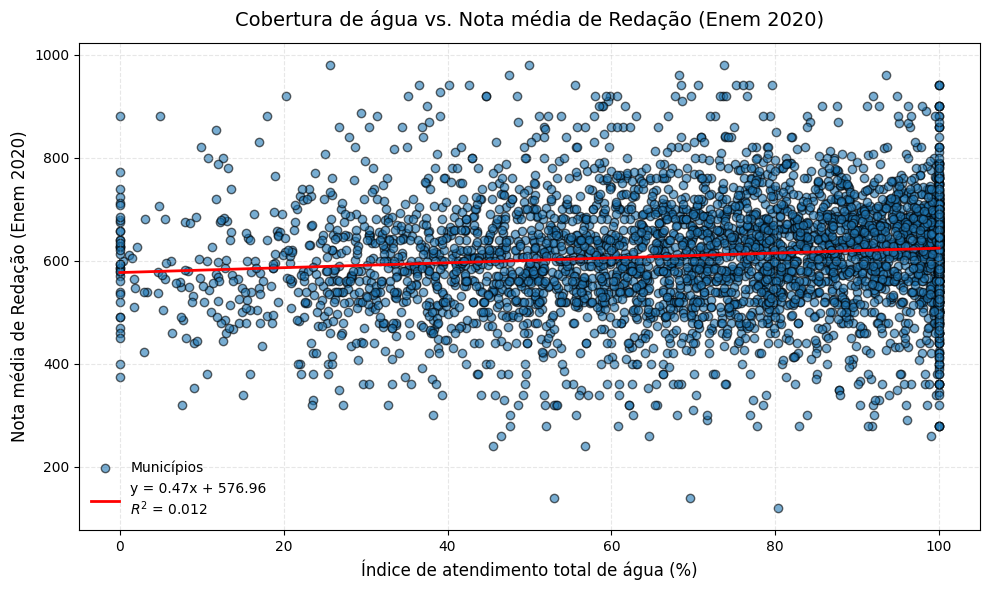

In [16]:
coluna_notas = {
    "NU_NOTA_CN_MEAN": "Nota média de Ciências Naturais (Enem 2020)",
    "NU_NOTA_CH_MEAN": "Nota média de Ciências Humanas (Enem 2020)",
    "NU_NOTA_LC_MEAN": "Nota média de Linguagens e Códigos (Enem 2020)",
    "NU_NOTA_MT_MEAN": "Nota média de Matemática (Enem 2020)",
    "NU_NOTA_REDACAO_MEAN": "Nota média de Redação (Enem 2020)",
}

for nota in coluna_notas:
    plot_scatter(
        df_q1_merged,
        x="INDICE_ATENDIMENTO_TOTAL_AGUA",
        y=nota,
        ylabel=coluna_notas[nota],
    )

# Q2. Municípios com altas perdas na distribuição têm menor taxa de comparecimento ao exame?


In [28]:
df_q2 = df.copy()
df_q2 = df_q2[df_q2.CO_MUNICIPIO_ESC != 0]
df_q2 = df_q2[df_q2.IN_TREINEIRO == 0]

df_q2["NAO_COMPARECEU_PELO_MENOS_1_DIA"] = (
    (df_q2.TP_PRESENCA_LC == 0)
    | (df_q2.TP_PRESENCA_CH == 0)
    | (df_q2.TP_PRESENCA_CN == 0)
    | (df_q2.TP_PRESENCA_MT == 0)
)

df_q2_group = (
    df_q2[df_q2.NAO_COMPARECEU_PELO_MENOS_1_DIA].groupby(["CO_MUNICIPIO_ESC", "NO_MUNICIPIO_ESC"])
    .agg(
        NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT=(
            "NAO_COMPARECEU_PELO_MENOS_1_DIA",
            "sum",
        ),
        TOTAL=("NU_INSCRICAO", "count"),
    )
    .reset_index()
)

df_q2_group["TAXA_FALTA"] = (
    df_q2_group["NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT"] / df_q2_group["TOTAL"]
) * 100

df_q2_merged = df_q2_group.merge(
    df_saneamento, left_on="CO_MUNICIPIO_ESC", right_on="ID_MUNICIPIO"
).drop(columns=["ANO", "ID_MUNICIPIO"])[
    df_q2_group.columns.to_list() + ["INDICE_PERDA_DISTRIBUICAO_AGUA"]
]

df_q2_merged = df_q2_merged[df_q2_merged.INDICE_PERDA_DISTRIBUICAO_AGUA >= 80]

df_q2_merged.head()

,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT,TOTAL,TAXA_FALTA,INDICE_PERDA_DISTRIBUICAO_AGUA
16,1100205,Porto Velho,304,304,100.0,84.01
58,1200609,Tarauacá,16,16,100.0,80.87
61,1300029,Alvarães,1,1,100.0,83.16
103,1400233,Caroebe,2,2,100.0,82.03
105,1400456,Pacaraima,1,1,100.0,82.73


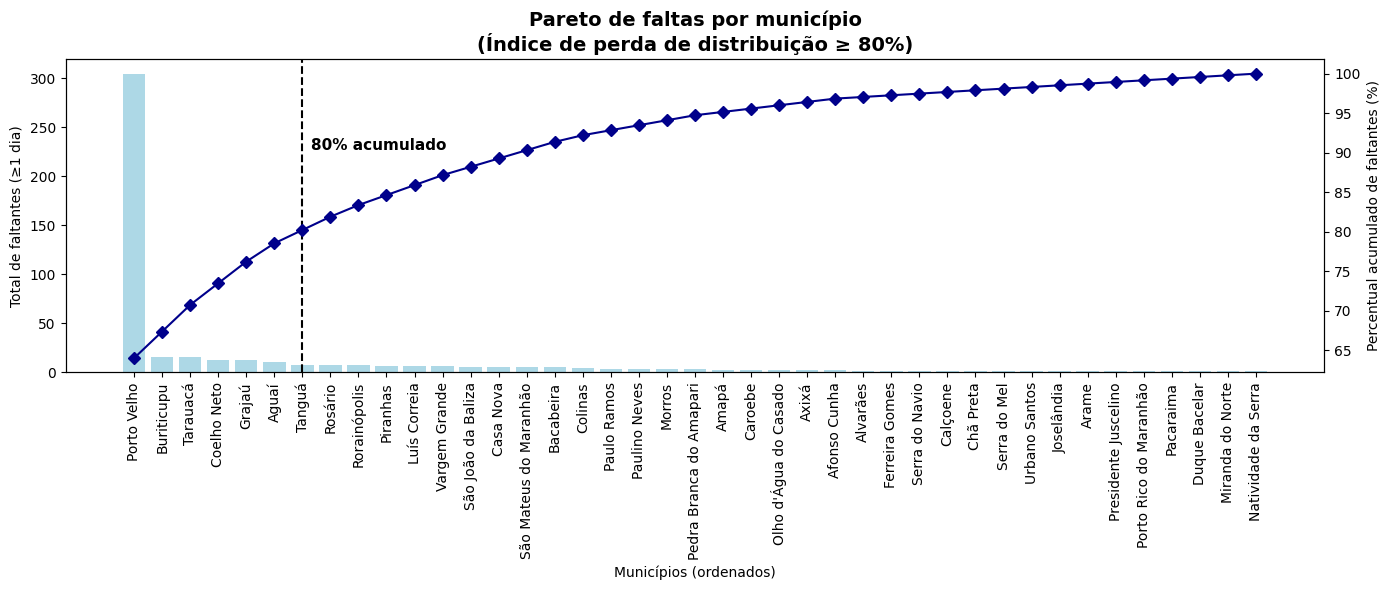

In [68]:
df_plot = df_q2_merged[["NO_MUNICIPIO_ESC", "NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT"]].copy()
df_plot = df_plot.sort_values("NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT", ascending=False)
df_plot["CUMULATIVE_PERCENT"] = (
    df_plot["NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT"].cumsum()
    / df_plot["NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT"].sum()
) * 100

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(df_plot["NO_MUNICIPIO_ESC"], df_plot["NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT"], color='lightblue')
ax.set_ylabel("Total de faltantes (≥1 dia)")
ax.set_xlabel("Municípios (ordenados)")

idx_80 = df_plot["CUMULATIVE_PERCENT"].ge(80).idxmax()
x_80 = df_plot.index.get_loc(idx_80)

ymax = ax.get_ylim()[1]

ax.axvline(x=x_80, linestyle="--", color="black")
ax.text(x_80 + 0.3, ymax * 0.7, r"80% acumulado", va="bottom", ha="left", fontdict={"size": 11, "weight": "bold"})

ax.set_xticks(range(len(df_plot)))
ax.set_xticklabels(df_plot["NO_MUNICIPIO_ESC"], rotation=90)

ax2 = ax.twinx()
ax2.plot(df_plot["NO_MUNICIPIO_ESC"], df_plot["CUMULATIVE_PERCENT"], marker="D", linestyle="-", color='darkblue')
ax2.set_ylabel("Percentual acumulado de faltantes (%)")

plt.title("Pareto de faltas por município\n(Índice de perda de distribuição ≥ 80%)", fontsize=14, fontdict={"weight": "bold"})
plt.tight_layout()
plt.show()

In [37]:
df_q2[df_q2.NO_MUNICIPIO_ESC == 'Porto Velho'].shape[0]

862

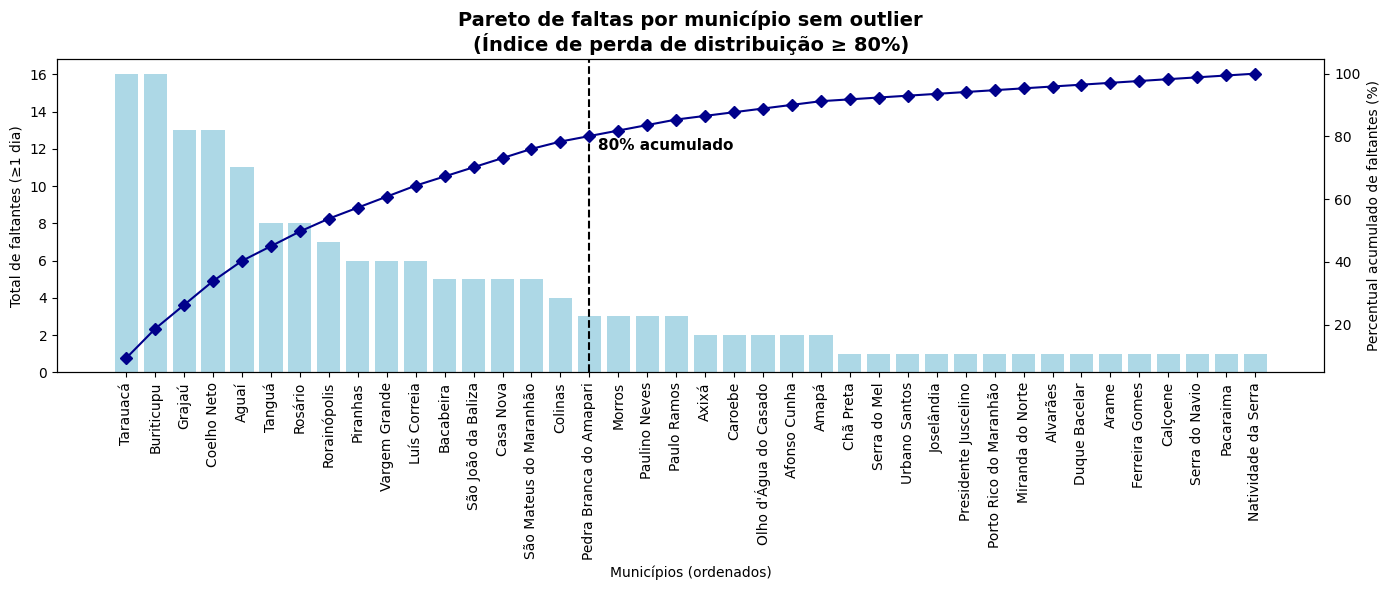

In [69]:
df_plot = df_q2_merged[df_q2_merged.NO_MUNICIPIO_ESC != 'Porto Velho'][["NO_MUNICIPIO_ESC", "NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT"]].copy()
df_plot = df_plot.sort_values("NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT", ascending=False)
df_plot["CUMULATIVE_PERCENT"] = (
    df_plot["NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT"].cumsum()
    / df_plot["NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT"].sum()
) * 100

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(df_plot["NO_MUNICIPIO_ESC"], df_plot["NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT"], color='lightblue')
ax.set_ylabel("Total de faltantes (≥1 dia)")
ax.set_xlabel("Municípios (ordenados)")

idx_80 = df_plot["CUMULATIVE_PERCENT"].ge(80).idxmax()
x_80 = df_plot.index.get_loc(idx_80)

ymax = ax.get_ylim()[1]

ax.axvline(x=x_80, linestyle="--", color="black")
ax.text(x_80 + 0.3, ymax * 0.7, r"80% acumulado", va="bottom", ha="left", fontdict={"size": 11, "weight": "bold"})

ax.set_xticks(range(len(df_plot)))
ax.set_xticklabels(df_plot["NO_MUNICIPIO_ESC"], rotation=90)

ax2 = ax.twinx()
ax2.plot(df_plot["NO_MUNICIPIO_ESC"], df_plot["CUMULATIVE_PERCENT"], marker="D", linestyle="-", color='darkblue')
ax2.set_ylabel("Percentual acumulado de faltantes (%)")

plt.title("Pareto de faltas por município sem outlier\n(Índice de perda de distribuição ≥ 80%)", fontsize=14, fontdict={"weight": "bold"})
plt.tight_layout()
plt.show()